In [1]:
%run mqtt_thingy.ipynb

In [2]:
%cd ./util_interfaces/
%run advance_dashboard.ipynb

/home/dlar58/Documents/transformable-robot-hardware/Hardware_Control_ESP32/util_interfaces
info
        
        Always be aware that this version of dashboard is instanced when defination.
        Which means that there cannot be two dashboard in the same ipynb kernel.
        
        


Box(children=(Button(description='buttoner', disabled=True, layout=Layout(height='30px', width='auto'), style=…

Box(children=(StateButton(description='loop_timer', layout=Layout(height='30px'), style=ButtonStyle(button_col…

In [3]:
    # R1=Responder(("10.144.113.5",1885),"ho1_ret")
    # R1.to="ho1"

In [4]:
    R1=Responder(("10.144.113.5",1885),"ho1_ret")
    R1.to="ho1"

/tmp/ipykernel_420849/1161333552.py:8: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Connected successfully!


In [5]:
    R2=Responder(("10.144.113.5",1885),"ho4_ret")
    R2.to="ho4"

/tmp/ipykernel_420849/1161333552.py:8: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


In [6]:
def rett(task):
    k=ipywidgets.Textarea(layout=ipywidgets.Layout(width='500px', height='100px'))
    task.start()
    return (k,)

@TaskHandlerButtonAdvanced.add_to_state_button(s, rett)
async def control_loop(task, sleep_interval=0.05, keep_len=10):
    global actions
    obs = task.widgets[0]
    
    @loop(sleep_interval)
    def go():
        obs.value="\n".join([str(i) for i in R1.ret_list][::-1])
    
    # await asyncio.gather(R.loop_recv(),go())
    await asyncio.gather(go())
t=control_loop("control_loop")

In [7]:
await asyncio.sleep(0.1)

Connected successfully!


In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import time


In [9]:
InitL = np.array([0, 0, 0, 0, 0])*(1/135)
InitR = np.array([0, 0, 0, 0, 0])*(1/135)
R1.send_exe(f"esp.pca_moves({InitL.tolist()})")
R2.send_exe(f"esp.pca_moves({InitR.tolist()})")

In [10]:
await asyncio.sleep(1)

In [11]:
s.display()

Box(children=(Button(description='buttoner', disabled=True, layout=Layout(height='30px', width='auto'), style=…

Box(children=(StateButton(description='loop_timer', layout=Layout(height='30px'), style=ButtonStyle(button_col…

Box(children=(StateButton(description='control_loop', layout=Layout(height='30px'), style=ButtonStyle(button_c…

In [40]:
#%% Define constants and parameters


#%% Define constants and parameters

n = 5 # for one single leg

# Frequency
omega_val = 2 * np.pi
omegaR1 = np.ones(n) * omega_val
omegaR2 = np.ones(n) * omega_val


# Convergence rate
mu_const = 1
muR1 = np.ones(n) * mu_const
muR1 = np.ones(n) * mu_const

mu = np.ones(n) * mu_const


# Amplitude
a_val = 10
a_paramR1 = np.ones(n) * a_val
a_paramR2 = np.ones(n) * a_val




# # snake Side-Winding

R_val = 25
# R_ampR1 = np.array([0.5, 0, 1.0, 0, -1.5])*R_val
# R_ampR2 = np.array([-1.5, 0, 1.0, 0, -3])*R_val

# # Snake forward (for both hardware and simulation)
# R_ampR1 = np.array([0, 1, 0, 1, 0])*R_val
# R_ampR2 = np.array([0, 1, 0, 1, 0])*R_val


# Snake forward 2
R_ampR1 = np.array([0, 30, 0, 30, 0])
R_ampR2 = np.array([0, 60, 0, -0, 0])



# # Snake turn
# R_ampR1 = np.array([1, -1, 1, -1, 1])*R_val
# R_ampR2 = np.array([1, -1, 1, -1, 1])*R_val



# # Mechanical offsets
# los = np.array([3, 3, 3, 3, 3])
# ros = np.array([-12, -12, -12, -12, -12])


# Joint offsets: For integration
# # snake forward (for hardware)
# OffsetsR1 = np.array([90, 0, -5, -0, -90]) 
# OffsetsR2 = np.array([90, 0, -5, -0, -90])


# # snake forward (for simulation)
# OffsetsR1 = np.array([90, 0, -0, -0, -90])
# OffsetsR2 = np.array([90, 0, -0, -0, -90])


# snake forward 2
OffsetsR1 = np.array([0, -10, -0, 90, -0]) 
OffsetsR2 = np.array([0, 60, 45, -45, -0])


# # snake turn
# OffsetsR1 = np.array([0, 0, -0, -0, -0]) 
# OffsetsR2 = np.array([0, 0, -0, -0, -0])

# Desired phase differences

# high-level phase: R1, R2
# To change the initial condition of integration, as a high level CPG parameter
phi_tilde_high = [0, 0]   # for two legs synchronized
# phi_tilde_high = [0, np.pi]   # phase delays of between two legs: haR1 of the period


# Low level CPG

# phi_tilde_R1 = [0, 0.5*np.pi, 1*np.pi, 0.5*np.pi, 0*np.pi]
# phi_tilde_R2 = [0, 0.5*np.pi, 1*np.pi, 0.5*np.pi, 0*np.pi]

phi_tilde_R1 = [0, 0.5*np.pi, 0, 0.5*np.pi, 0]
phi_tilde_R2 = [0, 0.5*np.pi, 0, 0, 0]


# # Desired phase differences
# theta_tilde = np.array([np.pi/2, 2*np.pi/2, np.pi/2, 0*np.pi/2])

theta_tilde_R1=[phi_tilde_R1[i+1]-phi_tilde_R1[i] for i in range(4)]
theta_tilde_R2=[phi_tilde_R2[i+1]-phi_tilde_R2[i] for i in range(4)]



# phi_tilde = [0, 0, np.pi/2, 0, 0, 0, 0, 0, 0, 0]  # turning

# theta_tilde=[phi_tilde[i+1]-phi_tilde[i] for i in range(9)]

#%% ODE setup
phi0_R1 = np.zeros(n)   # initial phases
r0_R1   = np.zeros(n)   # initial amplitudes
dr0_R1  = np.zeros(n)   # initial amplitude derivatives

x0_R1 = np.concatenate((phi0_R1, r0_R1, dr0_R1))


phi0_R2 = np.zeros(n) + phi_tilde_high[1]   # initial phases
r0_R2   = np.zeros(n)   # initial amplitudes
dr0_R2  = np.zeros(n)   # initial amplitude derivatives

x0_R2 = np.concatenate((phi0_R2, r0_R2, dr0_R2))


In [41]:
#%% Matrices A and B
A = np.zeros((n, n))
A[0, 0] = -mu[0]
if n >= 2:
    A[0, 1] = mu[1]
for i in range(1, n - 1):
    A[i, i - 1] = mu[i]
    A[i, i]     = -2 * mu[i]
    A[i, i + 1] = mu[i]
A[n - 1, n - 2] = mu[n - 1]
A[n - 1, n - 1] = -mu[n - 1]

B = np.zeros((n, n - 1))
B[0, 0] = 1
for i in range(1, n - 1):
    B[i, i - 1] = -1
    B[i, i]     = 1
B[n - 1, n - 2] = -1


dt = 0.05 # time step
t_span = (0, 20)  # simulate for 20 seconds
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1]/dt)) # time points: based on dt and t_span

#%% ODE function definition
def cpgODE(t, x, omega, A, B, theta_tilde, a_param, R_amp, n):
    """
    Compute the derivatives for the CPG system.
    x is [phi, r, dr] with each block of length n.
    Returns: [dphi; dr; ddr]
    """
    phi = x[0:n]
    r   = x[n:2*n]
    dr  = x[2*n:3*n]

    # Phase derivatives
    dphi = omega + A.dot(phi) + B.dot(theta_tilde)

    # Second derivatives for amplitude
    ddr = a_param * ((a_param / 4) * (R_amp - r) - dr)

    # Note: The derivative of r is dr (not r)
    return np.concatenate((dphi, dr, ddr))

#%% Solve the ODE
sol_R1 = solve_ivp(
    lambda t, y: cpgODE(t, y, omegaR1, A, B, theta_tilde_R1, a_paramR1, R_ampR1, n),
    t_span,
    x0_R1,
    t_eval=t_eval
)

sol_R2 = solve_ivp(
    lambda t, y: cpgODE(t, y, omegaR2, A, B, theta_tilde_R2, a_paramR2, R_ampR2, n),
    t_span,
    x0_R2,
    t_eval=t_eval
)


t_R1 = sol_R1.t
x_R1 = sol_R1.y.T  # shape (time_points, 3*n)

t_R2 = sol_R2.t
x_R2 = sol_R2.y.T  # shape (time_points, 3*n)



#%% Extract the results
phi_R1 = x_R1[:, :n]          # phases
r_R1   = x_R1[:, n:2*n]       # amplitudes
dr_R1  = x_R1[:, 2*n:3*n]     # amplitude derivatives


#%% Extract the results
phi_R2 = x_R2[:, :n]          # phases
r_R2   = x_R2[:, n:2*n]       # amplitudes
dr_R2  = x_R2[:, 2*n:3*n]     # amplitude derivatives


# Compute the rhythmic output signals: x_i = r_i * sin(phi_i)
desired_angle_R1 = r_R1 * np.sin(phi_R1) + np.ones(phi_R1.shape)*OffsetsR1
desired_angle_R2 = r_R2 * np.sin(phi_R2) + np.ones(phi_R2.shape)*OffsetsR2

normalize_min = -135
normalize_max = 135

In [42]:
OffsetsR1

array([  0, -10,   0,  90,   0])

In [43]:
# Normalize the output from -1 to 1
desired_angle_R1_normalized = (desired_angle_R1 - normalize_min) / (normalize_max - normalize_min) * 2 - 1
desired_angle_R2_normalized = (desired_angle_R2 - normalize_min) / (normalize_max - normalize_min) * 2 - 1

# Change the decimal length
desired_angle_R1_normalized = np.round(desired_angle_R1_normalized,4)
desired_angle_R2_normalized = np.round(desired_angle_R2_normalized,4)

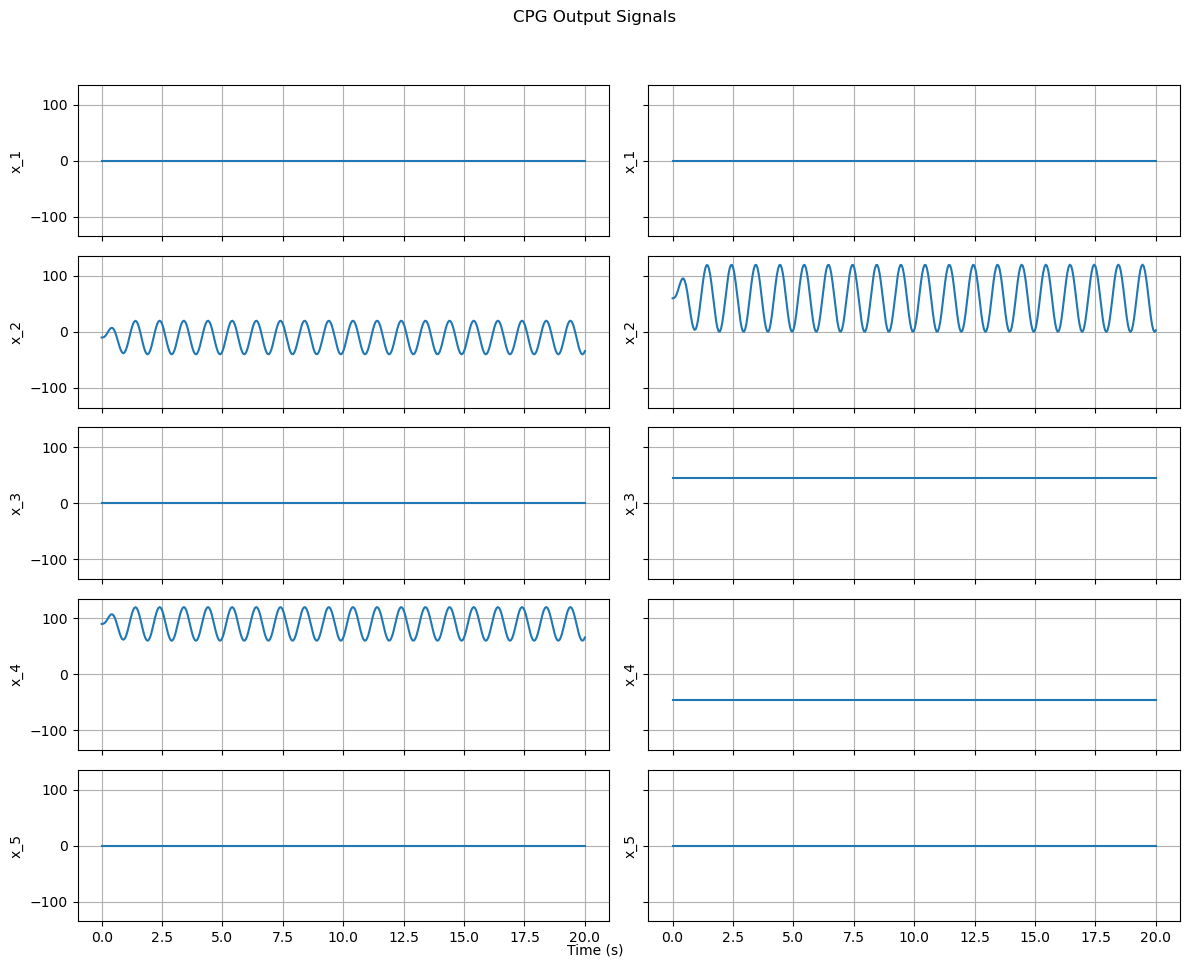

In [44]:
# Create a figure with n rows and 2 columns
fig, axs = plt.subplots(n, 2, figsize=(12, 2 * n), sharex='col', sharey=True)

# Loop over each oscillator to plot its corresponding row
for i in range(n):
    # Left column: plots for the first dataset
    axs[i, 0].plot(t_R1, desired_angle_R1[:, i], linewidth=1.5)
    axs[i, 0].set_ylabel(f'x_{i+1}')
    axs[i, 0].grid(True)
    axs[i, 0].set_ylim(-135, 135)
    
    # Right column: plots for the second dataset
    axs[i, 1].plot(t_R2, desired_angle_R2[:, i], linewidth=1.5)
    axs[i, 1].set_ylabel(f'x_{i+1}')
    axs[i, 1].grid(True)
    axs[i, 1].set_ylim(-135, 135)

# Add a common x-label and a title for the entire figure
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.suptitle('CPG Output Signals', y=0.98)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [17]:
# dir_map = np.array([-1, 1, -1, 1, -1])

# desired_angle_R1[40,:] - desired_angle_R2[40,:]*dir_map

In [18]:
# pps = int(2*np.pi/(phi_R2[11,1]-phi_R2[10,1]))

In [19]:
# pps

In [45]:
# # Create a figure with n rows and 2 columns
# fig, axs = plt.subplots(n, 2, figsize=(12, 2 * n), sharex='col', sharey=True)

# # Loop over each oscillator to plot its corresponding row
# for i in range(n):
#     # Left column: plots for the first dataset
#     axs[i, 0].plot(t_R1[2*pps:3*pps:1], desired_angle_R1[2*pps:3*pps, i], linewidth=1.5)
#     axs[i, 0].set_ylabel(f'x_{i+1}')
#     axs[i, 0].grid(True)
#     axs[i, 0].set_ylim(-135, 135)
    
#     # Right column: plots for the second dataset
#     axs[i, 1].plot(t_R2[2*pps:3*pps:1], desired_angle_R2[2*pps:3*pps, i], linewidth=1.5)
#     axs[i, 1].set_ylabel(f'x_{i+1}')
#     axs[i, 1].grid(True)
#     axs[i, 1].set_ylim(-135, 135)

# # Add a common x-label and a title for the entire figure
# fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
# fig.suptitle('CPG Output Signals', y=0.98)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()


In [51]:
InitR1 = desired_angle_R1_normalized[0,:]
InitR2 = desired_angle_R2_normalized[0,:]
R1.send_exe(f"esp.pca_moves({InitR1.tolist()})")
R2.send_exe(f"esp.pca_moves({InitR2.tolist()})")

In [22]:
await asyncio.sleep(1)

In [50]:
R1.send_exe(f"esp.flag=False")
R2.send_exe(f"esp.flag=False")

In [52]:
pps = int(2*np.pi/(phi_R2[11,1]-phi_R2[10,1]))

lR1 = desired_angle_R1_normalized[2*pps:3*pps:1,:].tolist()
lR2 = desired_angle_R2_normalized[2*pps:3*pps:1,:].tolist()

R1.send_exe(f"esp.ta=loop.create_task(from_li({lR1},0.05,5))")
R2.send_exe(f"esp.ta=loop.create_task(from_li({lR2},0.05,5))")


In [25]:
# li = [-0.278, 0.6667, 0.8552, -0.7037, -0.6667]

# R1.send_exe(f"esp.pca_moves({li})")


In [26]:
# li = [0.5353, 0.6667, -0.533, -0.6296, 0.6667]
# R2.send_exe(f"esp.pca_moves({li})")

In [27]:
# InitL = np.array([3, 3, 3, 3, 3])*(1/135)
# # InitR = np.array([-12, -12, -12, -12, -12])*(1/135)
# R1.send_exe(f"esp.pca_moves({InitL.tolist()})")
# R2.send_exe(f"esp.pca_moves({InitR.tolist()})")

In [28]:
InitL = np.array([0, 30, 0, 90, 0])*(1/135)
InitR = np.array([0, 60, 45, -45, 0])*(1/135)
R1.send_exe(f"esp.pca_moves({InitL.tolist()})")
R2.send_exe(f"esp.pca_moves({InitR.tolist()})")

In [29]:
desL = np.array([0, 0, 0, 0, 0])*(1/135)
desR = np.array([0, 0, 0, 0, 0])*(1/135)
R1.send_exe(f"esp.pca_moves({desL.tolist()})")
R2.send_exe(f"esp.pca_moves({desR.tolist()})")

In [30]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [49]:
R1.send_exe(f"esp.ta.cancel()")
R2.send_exe(f"esp.ta.cancel()")

In [ ]:
R1.ret_list